In [2]:
from pandas.io.data import get_data_yahoo
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [3]:
#data4 = get_data_yahoo("AMZN", start = '2010-06-18', end = '2015-06-18')[['Close']]
#data.plot(subplots = True, figsize = (16,8));
#stock_data = get_data_yahoo(['AAPL','BBRY','LULU','AMZN'], start = '2010-06-18', end = '2015-06-18')[['Close']]
#stock_data.to_frame().head() #when use [['Close']],it is panel, need to be converted to DataFrame
stock_data = get_data_yahoo(['AAPL','BBRY','LULU','AMZN'], start = '2010-06-18', end = '2015-06-18')['Close']
#stock_data.to_csv('stock.closes.prive.csv')
#prices = stock_data['Close']
#type(stock_data)
#stock_data.head()
#stock_data.plot(subplots=True,figsize =(16,8),freq='M'); #this is wrong
#stock_data.plot(subplots=True,figsize =(16,8),sharey=True);


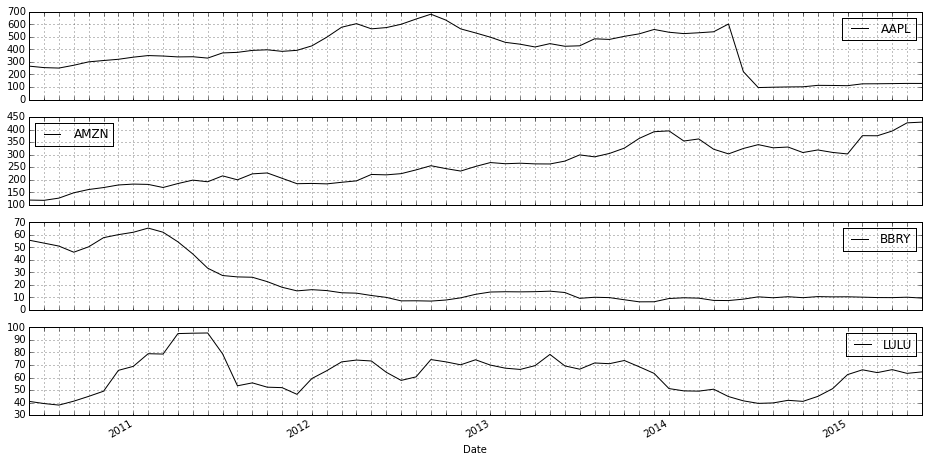

In [4]:
dateIndex= pd.date_range(start='2010-06-18',end='2015-06-18',freq='M');
MonthEnd_price = stock_data.resample('M');
#plt.legend(loc = 'best');
#print MonthEnd_price
#MonthEnd.plot(figsize=(16,8))  #draw four stocks on one plot
#MonthEnd_price.plot(subplots=True,figsize=(16,8),grid=1,xticks=dateIndex);
#MonthEnd_price['2011'].plot() #this will show month on the xticks
MonthEnd_price.plot(subplots=True,figsize=(16,8),grid=1,xticks=dateIndex);


In [3]:
import pandas.io.data as web
import vincent
#vincent.core.initialize_notebook() #not necessary


#All of the following import code comes from Python for Data Analysis
all_data = {}

for ticker in ['AAPL', 'LULU']:
    all_data[ticker] = web.get_data_yahoo(ticker, '6/18/2010', '6/15/2015')

price = pd.DataFrame({tic: data['Close']
                      for tic, data in all_data.iteritems()})

#Create line graph, with monthly plotting on the axes
line = vincent.Line(price,columns=['AAPL'])
line.axis_titles(x='Time',y='Value')
line.display()
#line.to_json(path)

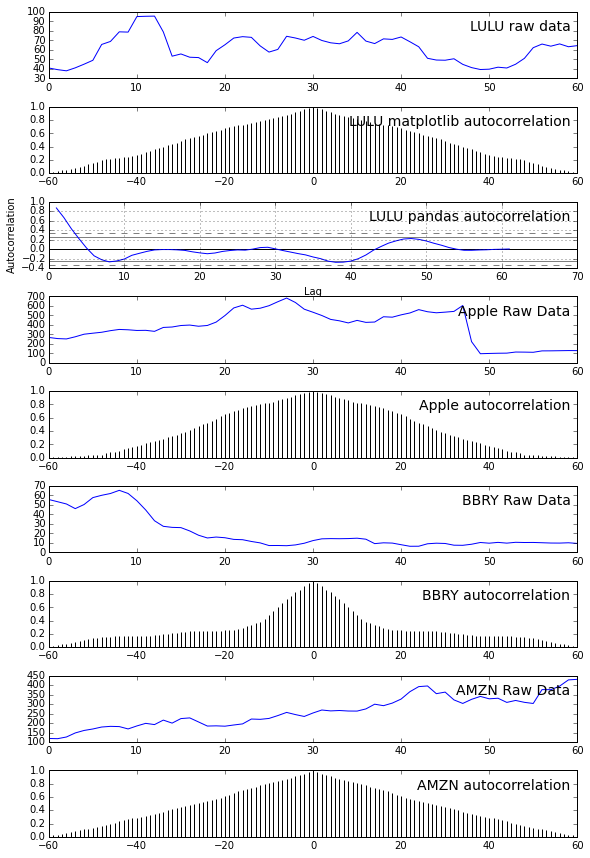

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data1 = get_data_yahoo("LULU", start = '2010-06-18', end = '2015-06-18')['Close']
data = data1.resample('M');
data2 = get_data_yahoo("AAPL", start = '2010-06-18', end = '2015-06-18')['Close']
data21 = data2.resample('M');
data3 = get_data_yahoo("BBRY", start = '2010-06-18', end = '2015-06-18')['Close']
data31 = data3.resample('M');
data4 = get_data_yahoo("AMZN", start = '2010-06-18', end = '2015-06-18')['Close']
data41 = data4.resample('M');

#x,y = np.random.randn(2,100)
#fig = plt.figure()
#ax1 = fig.add_subplot(111)
#ax1.xcorr(x, y, usevlines=True, maxlags=50, normed=True, lw=2)
#ax1.grid(True)
#ax1.axhline(0, color='black', lw=2)

#ax2 = fig.add_subplot(212, sharex=ax1)
#ax2.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
#ax2.grid(True)
#ax2.axhline(0, color='black', lw=2)

def label(ax, string):
    ax.annotate(string, (1, 1), xytext=(-8, -8), ha='right', va='top',
                size=14, xycoords='axes fraction', textcoords='offset points')

fig,axes = plt.subplots(nrows=9,figsize=(8,12))
fig.tight_layout()

axes[0].plot(data)
label(axes[0],'LULU raw data')
axes[1].acorr(data,maxlags=data.size-1); #or use data.values to retrieve value
label(axes[1],'LULU matplotlib autocorrelation')
pd.tools.plotting.autocorrelation_plot(data,ax=axes[2])
label(axes[2],'LULU pandas autocorrelation')
axes[3].plot(data21)
label(axes[3],'Apple Raw Data')
axes[4].acorr(data21,maxlags=data21.size-1);
label(axes[4],'Apple autocorrelation')
axes[5].plot(data31)
label(axes[5],'BBRY Raw Data')
axes[6].acorr(data31,maxlags=data31.size-1);
label(axes[6],'BBRY autocorrelation')
axes[7].plot(data41)
label(axes[7],'AMZN Raw Data')
axes[8].acorr(data41,maxlags=data41.size-1);
label(axes[8],'AMZN autocorrelation')



In [97]:
#import matplotlib.pyplot as plt
#import numpy as np

#data1 = get_data_yahoo("LULU", start = '2010-06-18', end = '2015-06-18')['Close']
#print data1.values
#print MonthEnd_price.AAPL.values
##fig = plt.figure()
#ax1 = fig.add_subplot(211)
#ax1.acorr(data1, usevlines=True, normed=True, maxlags=50, lw=2)
#ax1.grid(True)
#ax1.axhline(0, color='black', lw=2)
#plt.show()
type(MonthEnd_price)

pandas.core.frame.DataFrame

In [6]:
from pandas.io.data import DataReader
from datetime import date
import numpy as np
import pandas as pd

# Grab time series data for 5-year history for the stock (here AAPL)
# and for S&P-500 Index
sdate = date(2008,12,31)
edate = date(2013,12,31)
df = DataReader('WFM','yahoo',sdate,edate)
dfb = DataReader('^GSPC','yahoo',sdate,edate)

# create a time-series of monthly data points
rts = df.resample('M',how='last')
rbts = dfb.resample('M',how='last')
dfsm = pd.DataFrame({'s_adjclose' : rts['Adj Close'],
                        'b_adjclose' : rbts['Adj Close']},
                        index=rts.index)

# compute returns
dfsm[['s_returns','b_returns']] = dfsm[['s_adjclose','b_adjclose']]/\
    dfsm[['s_adjclose','b_adjclose']].shift(1) -1
dfsm = dfsm.dropna()
covmat = np.cov(dfsm["s_returns"],dfsm["b_returns"]

SyntaxError: invalid syntax (<ipython-input-6-e49980913a66>, line 23)

In [7]:
data11 = MonthEnd_price.AAPL/MonthEnd_price.AAPL.shift(1) -1
data22 = MonthEnd_price.BBRY/MonthEnd_price.BBRY.shift(1)-1
data32 = MonthEnd_price.LULU/MonthEnd_price.LULU.shift(1)-1
data42 = MonthEnd_price.AMZN/MonthEnd_price.AMZN.shift(1)-1


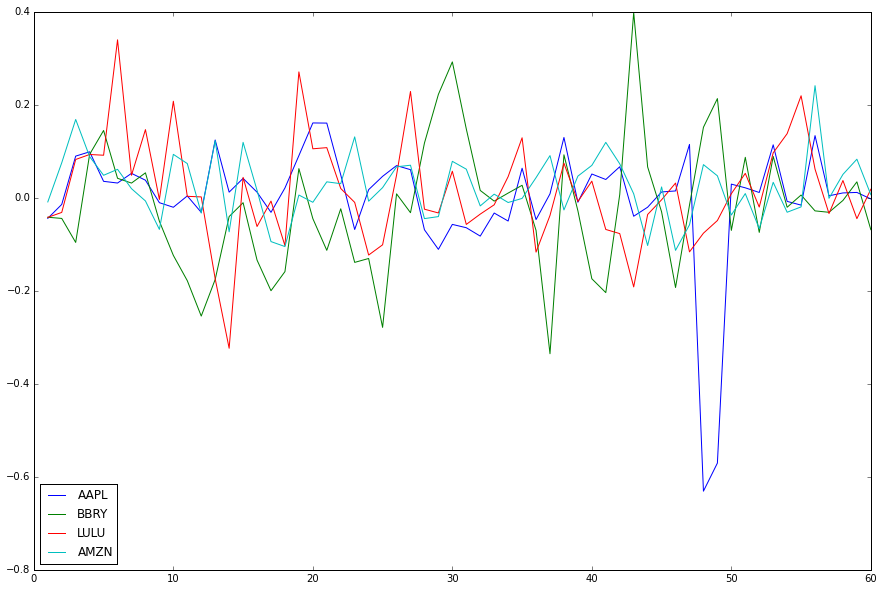

In [8]:
plt.figure(figsize=(15,10))
plt.plot(data11,label='AAPL',)
plt.plot(data22,label='BBRY')
plt.plot(data32,label='LULU')
plt.plot(data42,label='AMZN')
plt.legend(loc = 'best');

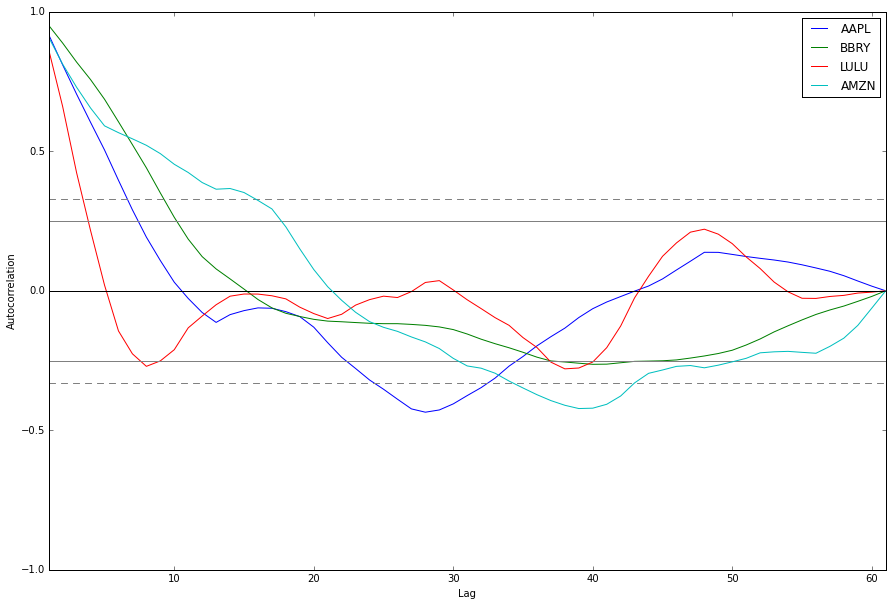

In [11]:
from pandas.tools.plotting import autocorrelation_plot
plt.figure(figsize=(15,10))
autocorrelation_plot(MonthEnd_price.AAPL,label='AAPL')
autocorrelation_plot(MonthEnd_price.BBRY,label='BBRY')
autocorrelation_plot(MonthEnd_price.LULU,label='LULU')
autocorrelation_plot(MonthEnd_price.AMZN,label='AMZN')